# COGS 118A - Assignment 1: KNN



The goal of this assignment is to be able to use Python to build a KNN model that is suitable for a given classification task. 

#### Part 1.  
Build a KNN to do handwritten digits prediction. The data consists of grey scale images of handwritten digits. Each image is a set of pixels stored as a vector. 

In [24]:

from sklearn.datasets import load_digits, load_wine
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
%matplotlib inline

Load the MNIST dataset. (Can take up to 3 minutes.) `x` stores the images and `y` stores the labels. For an image i, $x_{i}$ is a vector of its pixel values, and $y_{i}$ is its label. $y_{i} \in [1,2,3,4,5,6,7,8,9,0] $ .

In [26]:

mnist = sklearn.datasets.fetch_openml('mnist_784')
x = mnist.data.to_numpy(dtype= np.int64)
y = mnist.target.to_numpy(dtype= np.int64)

C:\Users\govinda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Separate training and testing data randomly.

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(
    x[:2500], y[:2500], test_size=0.2, random_state=123, stratify=y[:2500])
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2000, 784)
(500, 784)
(2000,)
(500,)


#### 1.1 (5 points)

For convinence, we have create a class object `knn` for storing our KNN model. Please fill in the missing instance methods. 

Instance method `fit` is the training process. For KNN it is simply storing the training dataset.

Instance method `distance` is a function that takes in two vectors (samples of data) and returns the distance between the two vectors. (1.5 points)

Hint: Try your best to avoid using for loops in `self.distance`. Or it would take too long for KNN to compute. 

Instance method `predict` uses KNN method to predict a given set of digit images. If the input is a N by d dimensional matrix, where d is the number of features and N is the number of samples, the output should be an N dimensional vector. (3 points)

Hint: Here are some useful numpy functions to help you achieve your goal: np.square, np.sqrt, np.zeros, np.ones, np.argsort, np.bincount, np.linalg.norm, np.dot, np.equal,np.mean, np.argmax 

Instance method `score` produces the accuracy of the KNN model when running on a test dataset. Accuracy is the precentage of the test data that is correctly classified. (Hint: you will first need to call `self.predict` to label the input test data.) (0.5 points)


In [28]:

class knn:
	def __init__(self, k):
		self.k = k
		self.X_train = None
		self.Y_train = None

	def fit(self, X, Y):
		self.X_train = X
		self.Y_train = Y

	def distance(self, x1, x2):
		return np.linalg.norm(x1-x2)
		# returns the distance between two vectors
		# the distance is the L2 norm
		# your solution here  
		#problem 1.1 , 1.5 points
        
		pass
	
	def predict(self, x_test):
		# returns the predictions for multiple examples X
		# your solution here
		#problem 1.2 , 3 points
		distances = np.sqrt(((self.X_train - x_test[:, np.newaxis]) ** 2).sum(axis=2))
		k_nearest_neighbors = np.argpartition(distances, self.k, axis=1)[:, :self.k]
		k_nearest_labels = self.Y_train[k_nearest_neighbors]
		return np.array([np.argmax(np.bincount(labels)) for labels in k_nearest_labels])
		pass
		
		
	def score(self, x_test, y_test):
		# returns the accuracy of the model
		# Return the accuracy of your model on the test data.
		# problem 1.3, 0.5 point
		Y_pred = self.predict(x_test)
		return np.sum(Y_pred == y_test)/len(y_test)
		pass
		

Compare the accuracy using our KNN model with the accuracy using Sklearn KNN to see if we have implemented correctly. The two accuracy scores should be fairly close.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
sklearn_knn = KNeighborsClassifier(n_neighbors = 5)
sklearn_knn.fit(X_train, Y_train)
sklearn_knn_score = sklearn_knn.score(X_test, Y_test)
print("sklearn_knn_score:", sklearn_knn_score)

our_knn = knn(k = 5)
our_knn.fit(X_train, Y_train)
our_knn_score = our_knn.score(X_test, Y_test)
print("our_knn_score:", our_knn_score)


sklearn_knn_score: 0.912
our_knn_score: 0.912


Let's visualize the images that are being misclassifed and compare that to the ones that are correctly classifed. This will help us to see the potential problems of our model. 

In [8]:
Y_pred = our_knn.predict(X_test)

incorrect = [i for i, x in enumerate(Y_pred!=Y_test) if x]
correct = [i for i, x in enumerate(Y_pred==Y_test) if x]

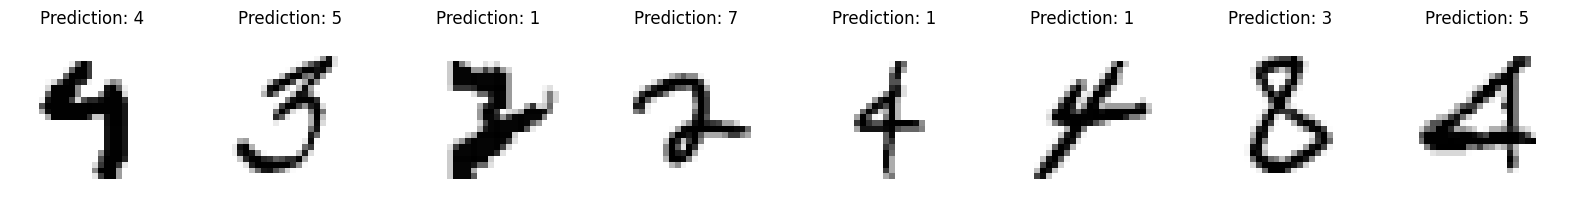

In [9]:
NUM_OF_IMAGES = 8 # number of images to display
_, axes = plt.subplots(nrows=1, ncols=NUM_OF_IMAGES, figsize=(20, 20))
START = 0 # start index of the images to display
for ax, ind in zip(axes, list(range(START,START+NUM_OF_IMAGES))):
    ax.set_axis_off()
    image = X_test[incorrect[ind]].reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {Y_pred[incorrect[ind]]}")


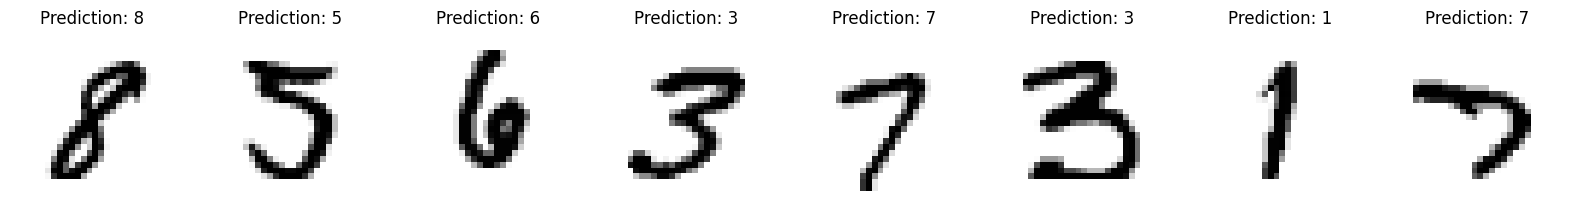

In [10]:

_, axes = plt.subplots(nrows=1, ncols=NUM_OF_IMAGES, figsize=(20, 20))
START = 120 # start index of the images to display
for ax, ind in zip(axes, list(range(START,START+NUM_OF_IMAGES))):
    ax.set_axis_off()
    image = X_test[correct[ind]].reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {Y_pred[correct[ind]]}")

#### 1.2 (4 points)


Test the training and test accuracy using any sets of k values ($k \in \mathbb{Z}^{+}$)  and plot the results with the x axis as the values of the k you picked and the y axis as the accuracies. 
You can plot it on two seperate graphs or on the same one. Make sure clearly label which one is for the training accuracy and which one is for the test accuracy. The type of graph you choose has to clearly indicate the trend you observe.

Good time to grab a coffee if it takes too long to run. 

NOTE: Use the KNN model you built for this task.


Plots (2 point)

**Answer the below questions**

What is the trend of your plot?         (1 point) <br/>
Answer: training accuracy significantly decreases and there is a slight drop testing accuracy as k increases

What k produces the optimal results?    (1 point)<br/>
Answer: k= 3 or 7 produces the highest testing accuracy 


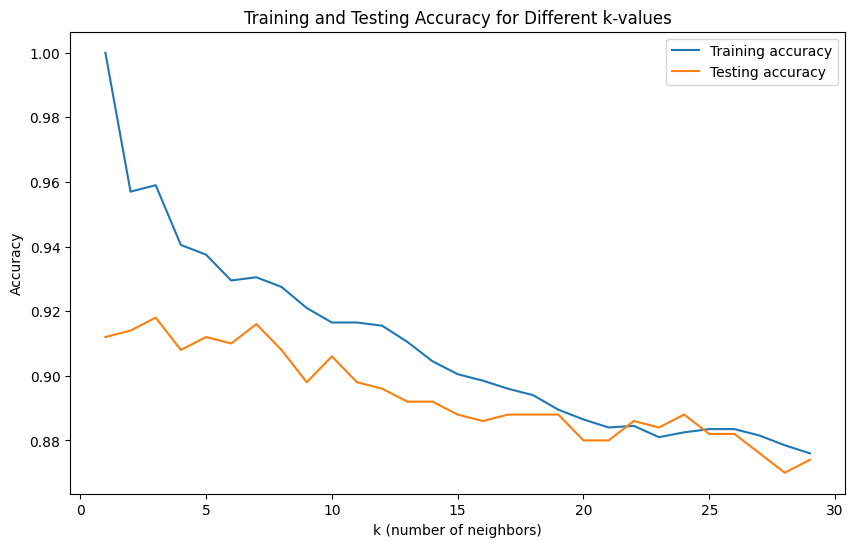

In [12]:
# Code for plots (2 points as mentioned above)
k_values = range(1, 30)
train_accuracies = []
test_accuracies = []

for k in k_values:
    model = knn(k)
    model.fit(X_train, Y_train)
    
    train_accuracy = model.score(X_train, Y_train)
    test_accuracy = model.score(X_test, Y_test)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Training accuracy')
plt.plot(k_values, test_accuracies, label='Testing accuracy')
plt.legend()
plt.xlabel('k (number of neighbors)')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy for Different k-values')
plt.show()

#### 1.3 (5 points)

Choose one other distance function from below or create your own distance function. Here is a list of distance functions that you could try.      

1. Manhattan Distance 
2. Cosine Distance 
3. L-Infinity norm 


In [ ]:
# Write the Python implementation here (1.5 points)
def distance(self, x1, x2):
    return np.sum(np.abs(x1-x2))


**Write answers to the below questions**

What is your distance function? Write down the distance equation. (0.5 point)<br/>
Answer:
 taking the sum of distances between the x and y coordinates.
 Manhattan Distance(x, y) = Σ |x - y|

Describe issues with using the L2 norm: (2 points)<br/>
Answer:
The L2 norm is the square root of the sum of the square of differences. squaring the differences amplifies the effect of large differences,which can cause big outliers.

What do you think is the reason your distance function performs better, worse, or similar than L2 norm? (1 points)<br/>
Answer:
The performance of the Manhattan distance compared to the L2 norm varies with data. If the data contains outliers, the Manhattan distance will perform better since it is less sensitive to large differences. However, if the geometry of the data is such that the diagonal distance is important, the L2 norm might perform better. 




### Problem 2

In this problem , we will be using the wine classfication dataset. Before opimizing our KNN model, it is imperative to understand the properties of our dataset.

More information about the dataset is linked below:

https://archive.ics.uci.edu/ml/datasets/wine

In [13]:
wine = load_wine()
X = wine.data
print(X.shape)
Y = wine.target
print(Y.shape)
print("feature names:", wine.feature_names)
print("target names:", wine.target_names)

(178, 13)
(178,)
feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
target names: ['class_0' 'class_1' 'class_2']


#### 2.1  (3 points)

Now, let’s classify the wine dataset using the L2 norm. Choose the optimal k value for this task and describe your approach.

You might need to change the k value a couple of times to find the one with the highest average test accuracy. Feel free to add a for loop. You are free to modify the cell however you want. 

Since we have limited data, we can use K-folds to assess the performance of our model more accurately. 

The accuracy for each test is stored in a list so we can take the average of the accuracy scores. 

NOTE: Use the KNN model you built for this task.


In [18]:

kf = KFold(n_splits=5, shuffle=True, random_state=123)

# Write down your approach in Python to finding the optimal k value below
# Create a list to store the average accuracy for each k
avg_scores = []

k_values = list(range(1, 31))
for k in k_values:
    model = knn(k)
    scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        model.fit(X_train, Y_train)
        scores.append(model.score(X_test, Y_test))
    avg_scores.append(np.mean(scores))

optimal_k = k_values[np.argmax(avg_scores)]

print(f"Optimal k-value: {optimal_k}")


Optimal k-value: 7



#### 2.2 (4 points)
Again, we would like to change our distance function to best fit our classification problem. Choose a distance function from what we have listed. It can be the same one from problem 1.3 . Set k equal to the optimal k you have found.


(It is okay if the new distance function performs worse than using the L2 norm. You just need to write the new distance function and apply KNN to the dataset. )

In [21]:
# Python implementation (1.5 points)
# Manhattan distance

def distance(self, x1, x2):
        return np.sum(np.abs(x1 - x2)) 
avg_scores = []

for k in k_values:
    model = knn(k)
    scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        model.fit(X_train, Y_train)
        scores.append(model.score(X_test, Y_test))
    avg_scores.append(np.mean(scores))

print(f"Best average accuracy: {max(avg_scores)}")

Best average accuracy: 0.7306349206349206




**Write answers to the below questions**

What is your distance function? Write down the distance equation. (0.5 point)<br/>
Answer: taking the sum of distances between the x and y coordinates.
 Manhattan Distance(x, y) = Σ |x - y|


What do you think is the reason your distance function performs better or worse than the L2 norm? (2 points)<br/>
Answer:
The performance of the Manhattan distance compared to the L2 norm varies with data. If the data contains outliers, the Manhattan distance will perform better since it is less sensitive to large differences. However, if the geometry of the data is such that the diagonal distance is important, the L2 norm might perform better. 
for this instance, I think manhattan distance might be a better since the factors aren't interrelated to each other

#### 2.3 (3 points)

We can further improve the accuracy of our model by normalizing the dataset.  

Data can be normalized using the following equation:

$$ x_{ij}^{normalized} = \frac{x_{ij} -\mu_{j}}{\sigma_{j}} $$
Where $x_{ij}$ is the value of feature j of sample i, 

$\mu_{j} $ and $\sigma_{j}$ are the mean and the standard deviation of feature j.

Normalize the wine dataset and apply your KNN model (with your favorite k value and distance function) on the normalized dataset. 

Print the new average accuracy score. 

In [23]:
# YOUR CODE HERE:
# Normalizing the dataset
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
my_knn = knn(k = 7)
avg_scores_normalized = []
for train_index, test_index in kf.split(X_normalized):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    my_knn.fit(X_train, Y_train)
    score = my_knn.score(X_test, Y_test)
    avg_scores_normalized.append(score)

new_avg_score_normalized = np.mean(avg_scores_normalized)
print("New average accuracy ", new_avg_score_normalized)

New average accuracy  0.9603174603174605


### 2.4 (1 Point)
Why do you think normalization can make a large improvement to our classification accuracy? 
normalization scales all features to the same range, which removes biases distance discrepancies. Since different features can have drastically different scales.